# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [143]:
import pandas as pd

In [144]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [145]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [146]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [147]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')

In [148]:
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [149]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')

In [150]:
df_seoul_moving.head()

,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합)
0,11010,23722310,22840982.81,30.278479,29.153578
1,11020,23806740,23402842.95,29.803839,29.298197
2,11030,21306040,17215624.50,29.478435,23.819052
3,11040,20913880,19770065.27,29.782858,28.153984
4,11050,20983760,20651120.15,30.212457,29.733522


In [151]:
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8', thousands=',')

In [152]:
df_seoul_business.head()

,자치구,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
0,종로구,5912,3613,1413
1,중구,6414,3542,982
2,용산구,2987,2076,1332
3,성동구,2785,1859,621
4,광진구,2861,1887,1577


In [153]:
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [154]:
df_seoul_people.head()

,자치구,남자,여자,계
0,종로구,74018,79666,153684
1,중구,63869,67581,131450
2,용산구,114571,121947,236518
3,성동구,141662,149947,291609
4,광진구,169525,183585,353110


In [155]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [156]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [157]:
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')

In [158]:
df = pd.merge(df,df_seoul_people,how='inner', on='자치구')

In [159]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),한식 일반 음식점업.1,커피전문점.1,기타주점업.1,남자,여자,계
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,23722310,22840982.81,30.278479,29.153578,5912,3613,1413,74018,79666,153684
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,23806740,23402842.95,29.803839,29.298197,6414,3542,982,63869,67581,131450
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21306040,17215624.50,29.478435,23.819052,2987,2076,1332,114571,121947,236518
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,20913880,19770065.27,29.782858,28.153984,2785,1859,621,141662,149947,291609
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,20983760,20651120.15,30.212457,29.733522,2861,1887,1577,169525,183585,353110


In [160]:
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),한식 일반 음식점업.1,커피전문점.1,기타주점업.1,남자,여자,계
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,23722310,22840982.81,30.278479,29.153578,5912,3613,1413,74018,79666,153684
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,23806740,23402842.95,29.803839,29.298197,6414,3542,982,63869,67581,131450
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21306040,17215624.50,29.478435,23.819052,2987,2076,1332,114571,121947,236518
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,20913880,19770065.27,29.782858,28.153984,2785,1859,621,141662,149947,291609
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,20983760,20651120.15,30.212457,29.733522,2861,1887,1577,169525,183585,353110
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,19860480,18498220.98,29.078089,27.083581,3566,1472,1082,172318,180274,352592
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,16932790,16473231.69,29.362694,28.565786,2479,1037,1000,193623,199977,393600
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,19831790,20628165.82,29.716468,30.909778,2822,1384,1030,212277,230403,442680
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,15319710,13821041.35,30.454258,27.475034,2663,1095,1275,145934,154890,300824
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,13965590,12564607.72,29.770458,26.783984,2009,837,477,154440,163660,318100


In [161]:
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),한식 일반 음식점업.1,커피전문점.1,기타주점업.1,남자,여자,계
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.429394,0.515416,0.351778,0.521199,0.308156,0.267956,0.318339,0.697314,0.675779,0.687074
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.319518,0.352848,0.282222,0.380646,0.146445,0.209808,0.315121,0.550032,0.580536,0.566615
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,0.351445,0.198532,-0.138462,-0.028279,0.413556,0.425180,0.262016,-0.294351,-0.268906,-0.281536
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,0.593483,0.565548,0.281500,0.417756,0.574076,0.530386,0.493852,0.359532,0.368034,0.364433
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,0.576231,0.545421,0.292605,0.409512,0.538578,0.494266,0.485755,0.384499,0.390470,0.388119
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,0.187904,0.056324,-0.062060,-0.165732,0.257629,0.204745,0.220043,-0.255715,-0.282278,-0.269854
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,0.178484,0.045913,-0.025462,-0.154519,0.212645,0.160374,0.227213,-0.192074,-0.221558,-0.207643
총 이동 시간,0.429394,0.319518,0.351445,0.593483,0.576231,0.187904,0.178484,1.000000,0.947054,0.598031,0.768985,0.889500,0.891016,0.683015,0.374911,0.403855,0.390448
총 이동 인구,0.515416,0.352848,0.198532,0.565548,0.545421,0.056324,0.045913,0.947054,1.000000,0.687296,0.916499,0.879292,0.870419,0.666662,0.523361,0.554242,0.540104
평균 이동 시간(분),0.351778,0.282222,-0.138462,0.281500,0.292605,-0.062060,-0.025462,0.598031,0.687296,1.000000,0.804361,0.458868,0.476684,0.511098,0.523333,0.560515,0.543347


## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다 (인당 최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 정류장 수와 승차 총 승객수

    H0 : 정류장 수와 승차 총 승객수는 연관이 없다

    
    H1 : 정류장 수와 승차 총 승객수는 연관이 있다

* 가설 2 노선 수와 총 이동시간

    H0 : 노선 수와 총 이동시간은 연관이 없다

    
    H1 : 노선 수와 총 이동시간은 연관이 있다


* 가설 3 정류장 수와 이동인구(합)

* 가설 4 노선 수와 평균 이동 시간

* 가설 5 노선 수와 커피전문점 이용자수

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [162]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [163]:
import scipy.stats as spst

result = spst.pearsonr(df['정류장수'],df['승차총승객수'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

# 강한 양의 상관관계 
# 귀무가설 기각 
# 정류장수와 승차 총승객수는 상관관계가 있다

상관계수 : 0.5666813370974585, p-value : 0.003141977397117322


상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음

- 음수 똑같음 




p-value 기준을 0.05로 가져갔죠 5% (1%, 0.1%)



p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)



- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 하는데 p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함



In [164]:
spst.pearsonr(df['노선수'],df['총 이동 시간'])
# p-value가 0.05보다 크다 == 귀무가설을 기각하지 못한다 == 대립가설이 틀렸다

PearsonRResult(statistic=0.3514451314469895, pvalue=0.08494128701931075)

In [165]:
spst.pearsonr(df['노선수'],df['커피전문점.1'])
# p-value가 0.05보다 작다 == 귀무가설을 기각한다 == 대립가설이 채택 == 대립가설이 맞았다

PearsonRResult(statistic=0.42518048108643286, pvalue=0.03410811239601253)

In [166]:
df['비율1'] = df['정류장수'] / df['승차총승객수'] * 10000
df.sort_values(by=['비율1']).head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),한식 일반 음식점업.1,커피전문점.1,기타주점업.1,남자,여자,계,비율1
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,23806740,23402842.95,29.803839,29.298197,6414,3542,982,63869,67581,131450,0.471314
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,19860480,18498220.98,29.078089,27.083581,3566,1472,1082,172318,180274,352592,0.583907
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,22230980,21648196.73,30.484634,29.685481,3689,2049,1672,250450,249886,500336,0.608687
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,35262290,54794888.64,31.353455,48.720859,11486,7273,2528,257096,280242,537338,0.621382
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,23722310,22840982.81,30.278479,29.153578,5912,3613,1413,74018,79666,153684,0.638150


In [167]:
df['비율2'] = df['노선수'] / df['커피전문점.1'] * 10000
df.sort_values(by=['비율2']).head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),한식 일반 음식점업.1,커피전문점.1,기타주점업.1,남자,여자,계,비율1,비율2
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,35262290,54794888.64,31.353455,48.720859,11486,7273,2528,257096,280242,537338,0.621382,125.120308
24,11250,강동구,369,21,2890053,2830506,99.161194,97.118065,20925070,26006859.57,31.205784,38.784313,3388,1660,1349,227891,237206,465097,1.276793,126.506024
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,31185440,43116095.86,32.530885,44.976269,5760,3372,1469,321963,346298,668261,0.735588,163.107948
15,11160,강서구,566,49,4681083,4652828,88.119480,87.587591,25147710,27080476.84,31.246805,33.648328,4584,2530,1709,277797,300629,578426,1.209122,193.675889
13,11140,마포구,562,97,5088461,4957596,103.907639,101.235343,24585440,27579049.42,30.262206,33.947039,4705,4475,2559,176886,201743,378629,1.104460,216.759777


## 4.관계 정리

### 1) 강한 관계의 변수

정류장 - 승차 총 승객수

### 2) 중간 관계의 변수

노선수 - 커피전문점.1(종사자수)

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

강남구 - 중구 - 동대문구 - 관악구에 필요합니다

In [168]:
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),한식 일반 음식점업.1,커피전문점.1,기타주점업.1,남자,여자,계,비율1,비율2
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,23722310,22840982.81,30.278479,29.153578,5912,3613,1413,74018,79666,153684,0.638150,293.384999
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,23806740,23402842.95,29.803839,29.298197,6414,3542,982,63869,67581,131450,0.471314,290.796160
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21306040,17215624.50,29.478435,23.819052,2987,2076,1332,114571,121947,236518,0.770887,322.736031
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,20913880,19770065.27,29.782858,28.153984,2785,1859,621,141662,149947,291609,1.549543,311.995697
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,20983760,20651120.15,30.212457,29.733522,2861,1887,1577,169525,183585,353110,0.978378,217.276100
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,19860480,18498220.98,29.078089,27.083581,3566,1472,1082,172318,180274,352592,0.583907,495.923913
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,16932790,16473231.69,29.362694,28.565786,2479,1037,1000,193623,199977,393600,1.001967,462.873674
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,19831790,20628165.82,29.716468,30.909778,2822,1384,1030,212277,230403,442680,0.965297,715.317919
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,15319710,13821041.35,30.454258,27.475034,2663,1095,1275,145934,154890,300824,0.855926,611.872146
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,13965590,12564607.72,29.770458,26.783984,2009,837,477,154440,163660,318100,1.086461,549.581840


In [128]:
df = df.sort_values(['승차총승객수', '노선수', '평균 이동 시간(분)'], ascending = False)
# df = df.sort_values('노선수', ascending = False)
# df = df.sort_values('평균 이동 시간(분)', ascending = False)

In [129]:
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),한식 일반 음식점업.1,커피전문점.1,기타주점업.1,남자,여자,계,비율1,비율2
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,35262290,54794888.64,31.353455,48.720859,11486,7273,2528,257096,280242,537338,0.621382,125.120308
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,22230980,21648196.73,30.484634,29.685481,3689,2049,1672,250450,249886,500336,0.608687,419.716935
21,11220,서초구,600,93,7221330,6977950,126.687777,122.418028,30181690,35823948.65,30.337351,36.008709,6712,3897,1255,197665,216012,413677,0.830872,238.645112
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,19831790,20628165.82,29.716468,30.909778,2822,1384,1030,212277,230403,442680,0.965297,715.317919
12,11130,서대문구,456,107,5863499,5796960,109.914502,108.667192,20089380,18643012.83,29.971266,27.813437,2694,1323,1127,149805,167270,317075,0.777693,808.767952
18,11190,영등포구,465,101,5739875,5783211,120.337855,121.246404,26590180,30243085.08,29.661974,33.736876,6476,3295,1489,198080,202161,400241,0.810122,306.525038
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,31185440,43116095.86,32.530885,44.976269,5760,3372,1469,321963,346298,668261,0.735588,163.107948
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,23722310,22840982.81,30.278479,29.153578,5912,3613,1413,74018,79666,153684,0.638150,293.384999
19,11200,동작구,438,94,5314274,5112276,124.295965,119.571419,20530240,18103100.17,29.223834,25.768914,2322,1628,955,190377,204272,394649,0.824195,577.395577
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,19860480,18498220.98,29.078089,27.083581,3566,1472,1082,172318,180274,352592,0.583907,495.923913


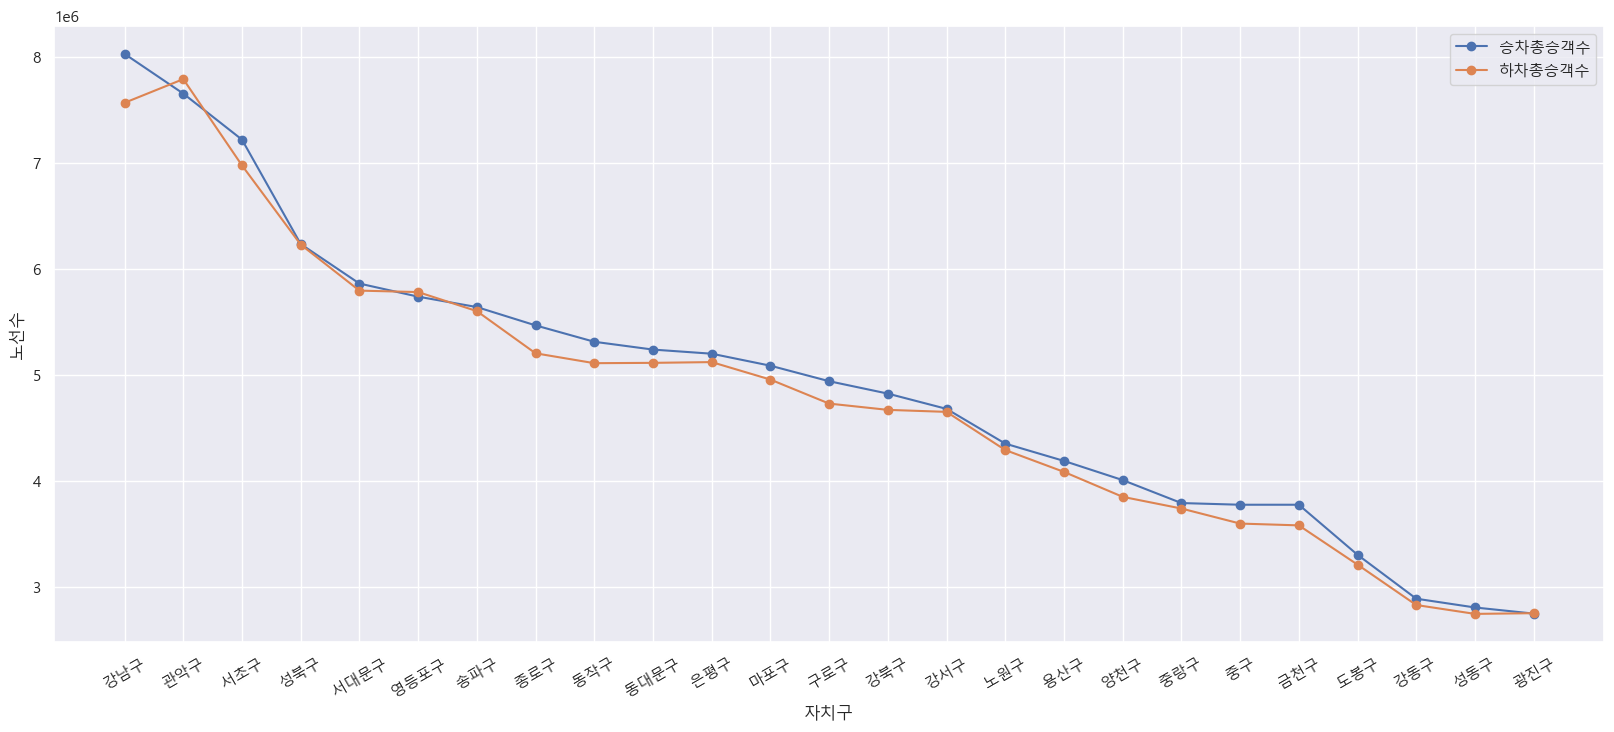

In [130]:
df = df.sort_values('승차총승객수', ascending = False)
plt.figure(figsize=(20,8))
plt.plot('자치구', '승차총승객수', data = df, marker = 'o')
plt.plot('자치구', '하차총승객수', data = df, marker = 'o')
plt.xticks(rotation = 30)
plt.xlabel('자치구')
# plt.ylabel('노선수')
plt.legend()
plt.show()

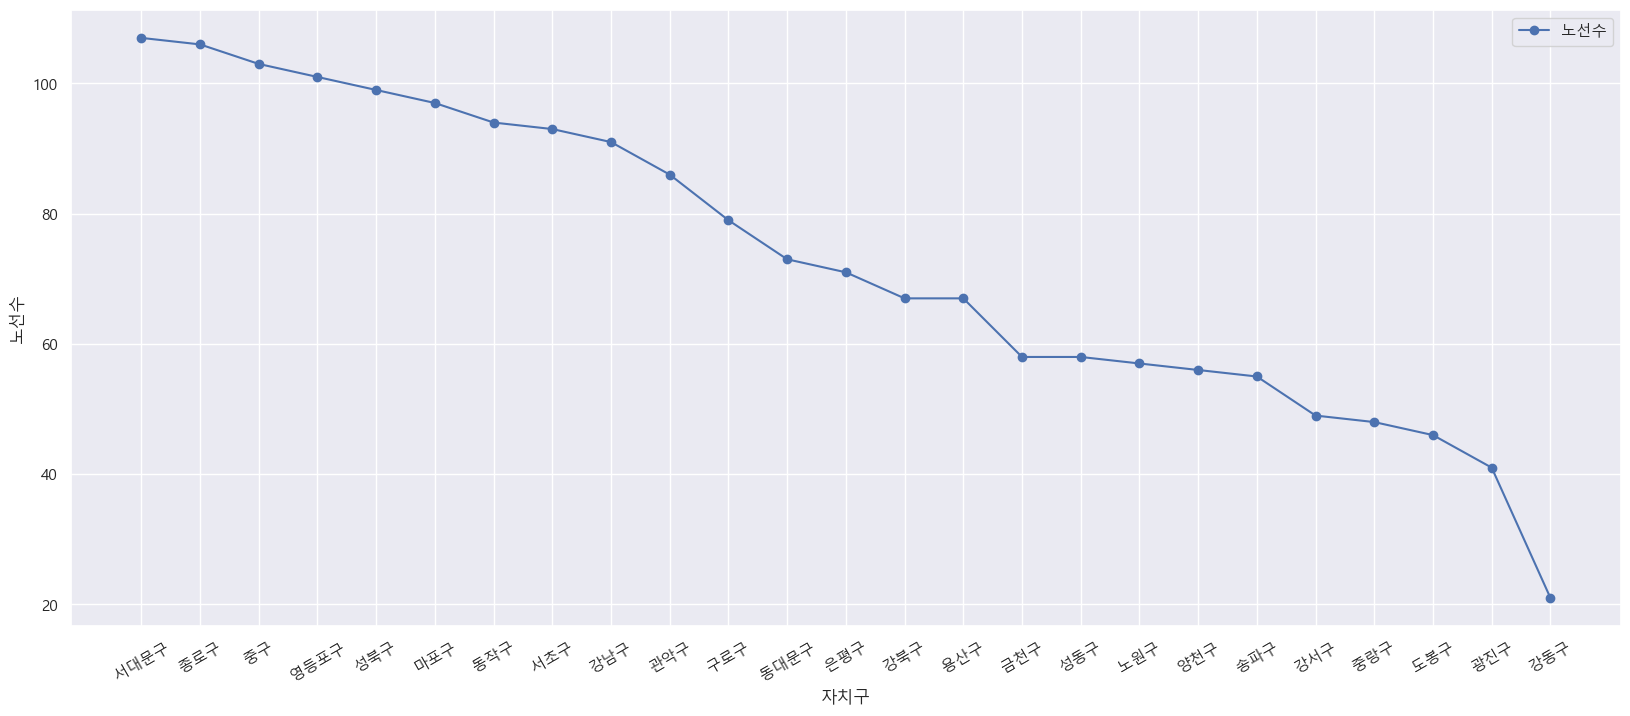

In [132]:
df = df.sort_values('노선수', ascending = False)
plt.figure(figsize=(20,8))
plt.plot('자치구', '노선수', data = df, marker = 'o')
# plt.hist(df.노선수, bins = 30)
plt.xticks(rotation = 30)
plt.xlabel('자치구')
plt.ylabel('노선수')
plt.legend()
plt.show()

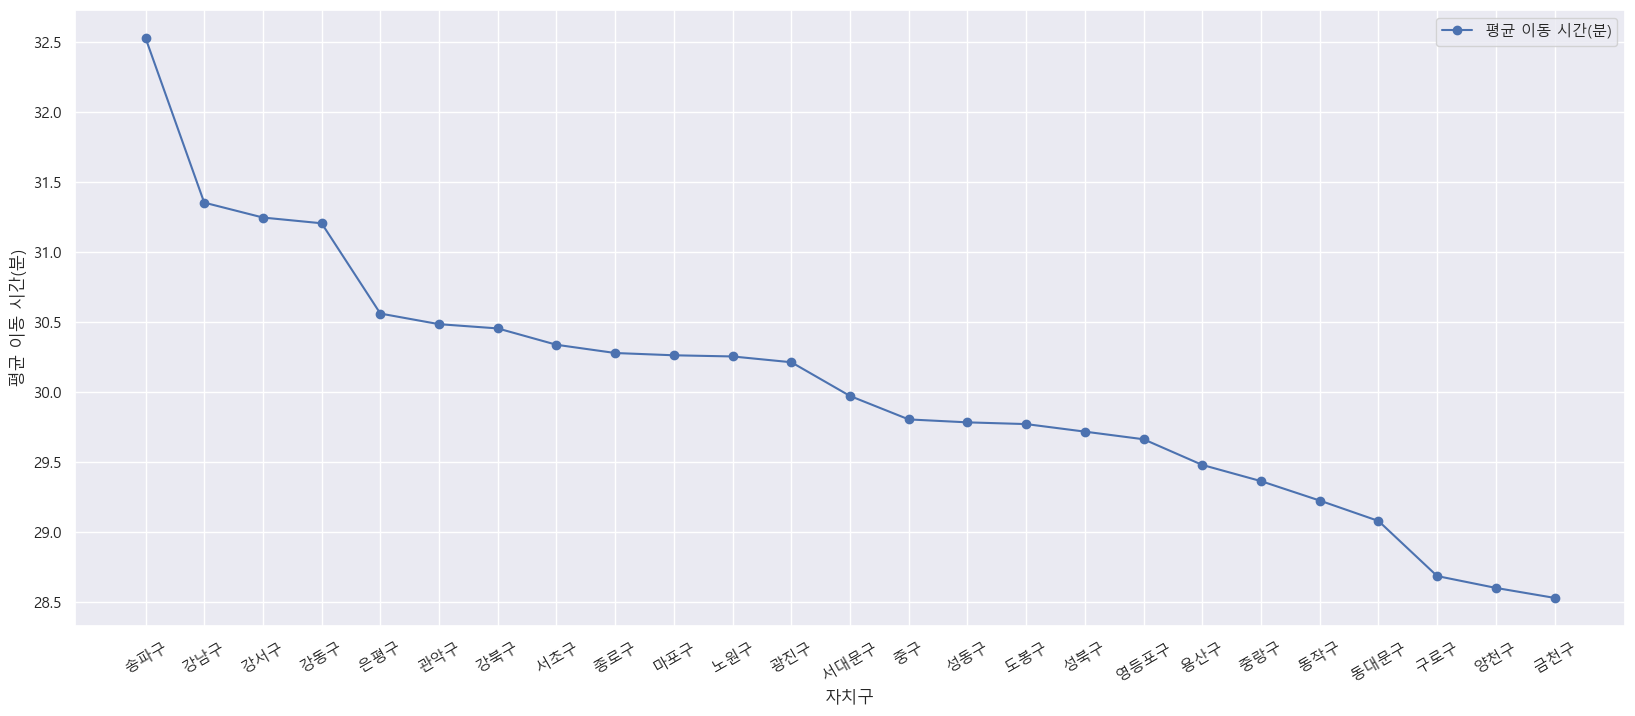

In [136]:
df = df.sort_values('평균 이동 시간(분)', ascending = False)
plt.figure(figsize=(20,8))
plt.plot('자치구', '평균 이동 시간(분)', data = df, marker = 'o')
plt.xticks(rotation = 30)
plt.xlabel('자치구')
plt.ylabel('평균 이동 시간(분)')
plt.legend()
plt.show()

In [141]:
a = pd.crosstab(df['노선수'], df['평균 이동 시간(분)'])
# print(a)
spst.chi2_contingency(a)
# 카이제곱 통계량
# p-value
# 자유도
# 기대빈도

(549.9999999999999,
 0.24564159936652855,
 528,
 array([[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
         0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
         0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
         0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
         0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
         0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
         0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
         0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
         0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
         0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
         0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

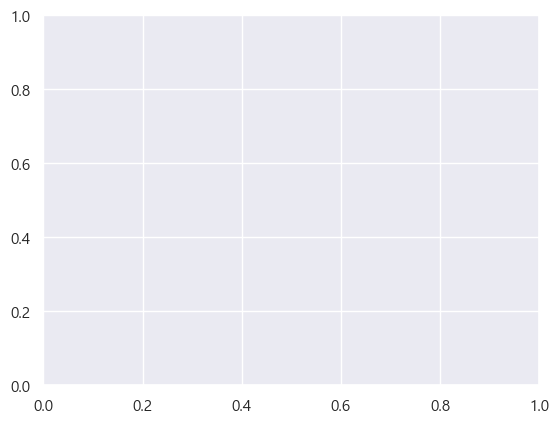

In [142]:
temp1 = 